In [28]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [44]:
data = pd.read_csv('MTA_130831_Pivotdown.txt')

## Let's take a look

In [45]:
data.head()

,C_A,UNIT,SCP,date,time,desc,entries,exits
0,A002,R051,02-00-00,08/24/2013,0:00:00,REGULAR,4246425,1454237
1,A002,R051,02-00-00,08/24/2013,4:00:00,REGULAR,4246460,1454243
2,A002,R051,02-00-00,08/24/2013,8:00:00,REGULAR,4246476,1454267
3,A002,R051,02-00-00,08/24/2013,12:00:00,REGULAR,4246542,1454333
4,A002,R051,02-00-00,08/24/2013,16:00:00,REGULAR,4246704,1454379


## Convert to datetime and use that as the index

In [48]:
def convert_to_datetime(row):
    return pd.to_datetime(row['date']+" "+row['time'], format="%m/%d/%Y %H:%M:%S")

In [49]:
data.index= data.apply(convert_to_datetime, axis=1)

In [50]:
data.head()

,C_A,UNIT,SCP,date,time,desc,entries,exits
2013-08-24 00:00:00,A002,R051,02-00-00,08/24/2013,0:00:00,REGULAR,4246425,1454237
2013-08-24 04:00:00,A002,R051,02-00-00,08/24/2013,4:00:00,REGULAR,4246460,1454243
2013-08-24 08:00:00,A002,R051,02-00-00,08/24/2013,8:00:00,REGULAR,4246476,1454267
2013-08-24 12:00:00,A002,R051,02-00-00,08/24/2013,12:00:00,REGULAR,4246542,1454333
2013-08-24 16:00:00,A002,R051,02-00-00,08/24/2013,16:00:00,REGULAR,4246704,1454379


## What range of days (and time) do we have?

In [52]:
data.index.min(), data.index.max()

(Timestamp('2013-08-24 00:00:00'), Timestamp('2013-08-30 23:59:45'))

## Looking at one day: Aug 24th

In [53]:
aug_24= data['2013-08-24']
aug_24.head(20)

,C_A,UNIT,SCP,date,time,desc,entries,exits
2013-08-24 00:00:00,A002,R051,02-00-00,08/24/2013,0:00:00,REGULAR,4246425,1454237
2013-08-24 04:00:00,A002,R051,02-00-00,08/24/2013,4:00:00,REGULAR,4246460,1454243
2013-08-24 08:00:00,A002,R051,02-00-00,08/24/2013,8:00:00,REGULAR,4246476,1454267
2013-08-24 12:00:00,A002,R051,02-00-00,08/24/2013,12:00:00,REGULAR,4246542,1454333
2013-08-24 16:00:00,A002,R051,02-00-00,08/24/2013,16:00:00,REGULAR,4246704,1454379
2013-08-24 20:00:00,A002,R051,02-00-00,08/24/2013,20:00:00,REGULAR,4246965,1454428
2013-08-24 00:00:00,A002,R051,02-00-01,08/24/2013,0:00:00,REGULAR,4004581,871141
2013-08-24 04:00:00,A002,R051,02-00-01,08/24/2013,4:00:00,REGULAR,4004613,871148
2013-08-24 08:00:00,A002,R051,02-00-01,08/24/2013,8:00:00,REGULAR,4004621,871164
2013-08-24 12:00:00,A002,R051,02-00-01,08/24/2013,12:00:00,REGULAR,4004692,871210


In [54]:
# get start entry and exit tallies per turnstile for that day
gr_24_min= aug_24.groupby(['C_A','UNIT','SCP'])[['entries','exits']].min().reset_index()
gr_24_min.rename(columns = {'entries':'start_entries','exits':'start_exits'}, inplace = True)

# get end entry and exit tallies per turnstile for that day
gr_24_max= aug_24.groupby(['C_A','UNIT','SCP'])[['entries','exits']].max().reset_index()
gr_24_max.rename(columns = {'entries':'end_entries','exits':'end_exits'}, inplace = True)

gr_24_max.drop(['C_A','UNIT','SCP'],axis=1,inplace=True)
gr_24 = pd.concat([gr_24_min,gr_24_max],axis=1)

del gr_24_max
del gr_24_min

In [55]:
gr_24.head()

,C_A,UNIT,SCP,start_entries,start_exits,end_entries,end_exits
0,A002,R051,02-00-00,4246425,1454237,4246965,1454428
1,A002,R051,02-00-01,4004581,871141,4005123,871281
2,A002,R051,02-03-00,170440,589544,170744,590868
3,A002,R051,02-03-01,3879768,6051903,3880497,6053164
4,A002,R051,02-03-02,3613094,4985114,3613866,4986101


## Entries and exits for that day
We'd be in trouble if we saw zero. And they are there.

In [69]:
gr_24['entries'] = gr_24.end_entries - gr_24.start_entries
gr_24['exits'] = gr_24.end_exits - gr_24.start_exits

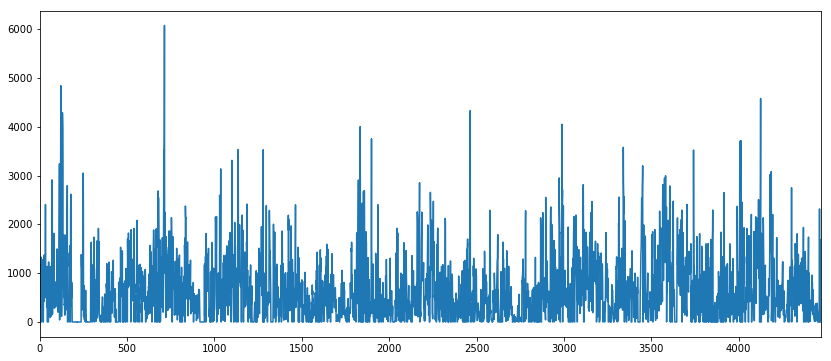

In [70]:
gr_24.entries.plot(figsize=(14,6))

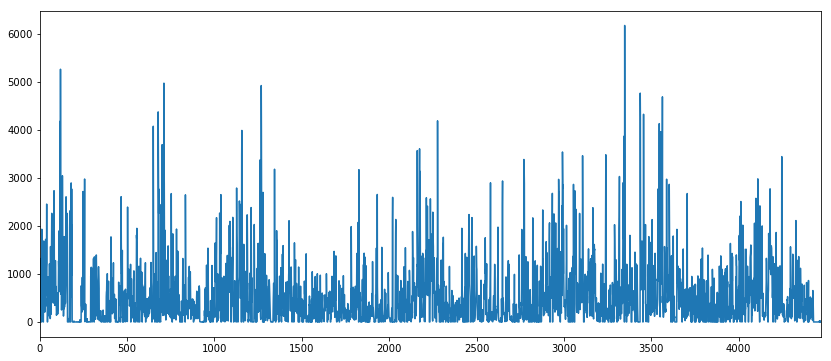

In [71]:
gr_24.exits.plot(figsize=(14,6))

In [72]:
gr_24.head()

,C_A,UNIT,SCP,start_entries,start_exits,end_entries,end_exits,entries,exits
0,A002,R051,02-00-00,4246425,1454237,4246965,1454428,540,191
1,A002,R051,02-00-01,4004581,871141,4005123,871281,542,140
2,A002,R051,02-03-00,170440,589544,170744,590868,304,1324
3,A002,R051,02-03-01,3879768,6051903,3880497,6053164,729,1261
4,A002,R051,02-03-02,3613094,4985114,3613866,4986101,772,987


## Outliers are quite high e.g. 6,078 for entries?

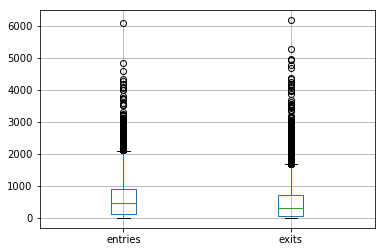

In [73]:
gr_24.boxplot(['entries','exits'])

In [66]:
gr_24.entries.max(), gr_24.exits.max()

(6078, 6178)

## Entries 

In [74]:
gr_24.entries.min(), gr_24.exits.min()

(0, 0)